## 1	– Considere	a	base	de	dados	(arquivo	dataset_5secondWindow%5B1%5D.csv):

### https://www.kaggle.com/fschwartzer/tmd-dataset-5-seconds-sliding-window

## 2	– Realize	o	pré-processamento	dos	dados:	Verifque	se	há	NaN	ou	outros	erros no	dados.	Selecione apenas	os	atributos	relevantes	e	numéricos.

In [1]:
#Importar biblioteca numpy, pandas e matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carregar arquivo .csv
df = pd.read_csv("data/dataset_5secondWindow%5B1%5D.csv")

#Remover valores NaN
df = df.dropna(axis='rows')

#Obter classes únicas do conjunto de dados
classes = pd.unique(df[df.columns[-1]])
classes = np.array(classes, dtype=str)

#Lista dos labels
list_labels = list(df.columns)

#Obter coluna de classes de cada linha
Y = np.array(df[list_labels[-1]], dtype=str)

#Remove a coluna de classes do conjunto de dados inicial
df = df.drop(list_labels[-1], axis=1)

#Converter em array numpy
X = np.array(df)

df.head(5)

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389


## 3	- No	caso	do	classificador	Knn,	verifique	o	efeito	do	parâmetro	k	na	classificação.

In [3]:
#Importando biblioteca de separação do conjunto de teste e treino
from sklearn.model_selection import train_test_split
#Bilioteca do classificador KNN
from sklearn.neighbors import KNeighborsClassifier
#Biblioteca do cálculo de acurácia
from sklearn.metrics import accuracy_score

In [4]:
#Função para classificação KNN em função de k, retornando a acurácia
def classificarKNN(conjunto_split, k, metric='euclidean', mode='normal'):
    #Obter dados separados
    train_x = conjunto_split[0]
    test_x = conjunto_split[1]
    train_y = conjunto_split[2]
    test_y = conjunto_split[3]
    
    #Obter modelo KNN
    model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    #Fazer fit entre conjuntos de treino
    model.fit(train_x, train_y)
    
    #Saída predita
    pred_y = model.predict(test_x)
    
    #Cálculo da acurácia
    score = accuracy_score(pred_y, test_y)
    return score

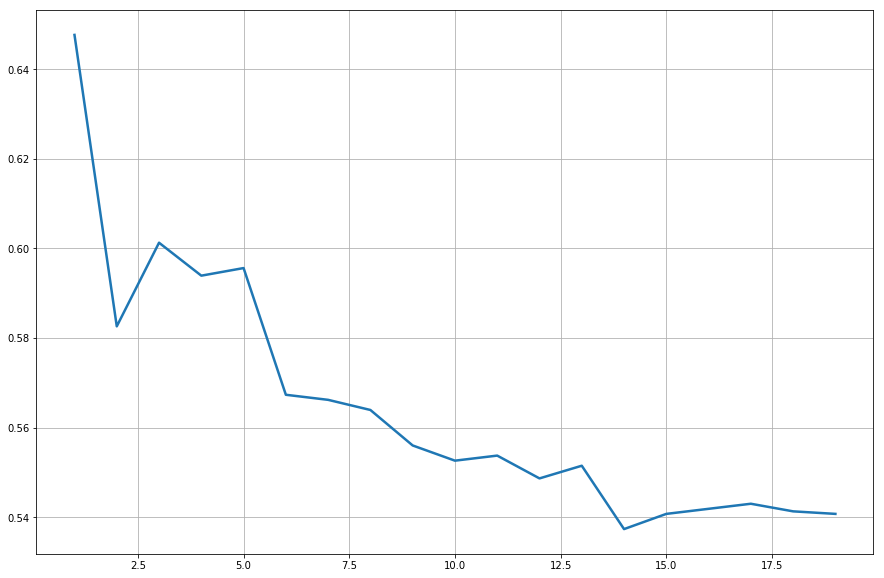

In [6]:
#Separando conjunto de teste e conjunto de treino
p=0.7
train_x, test_x, train_y, test_y = train_test_split(
    X, Y, test_size = 1-p, random_state = 42
)

#Facilitando o parâmetro para a função
conjunto_split = []
conjunto_split.append(train_x)
conjunto_split.append(test_x)
conjunto_split.append(train_y)
conjunto_split.append(test_y)

#Calculando a acurácia variando o k
acur = []
k_list = []
for k in np.arange(1, 20):
    acur.append(classificarKNN(conjunto_split=conjunto_split, k=k))
    k_list.append(k)

plt.figure(figsize=(15,10))
plt.plot(k_list, acur, linewidth=2.5)
plt.grid(True)
plt.show(True)

## 4 – Compare	os	classificadores:
- ### knn (melhor	k	observado	no	item	anterior)
- ### Naive	Bayes
- ### Decisão	Bayesiana

#### Classificador Bayesiano

In [7]:
#Biblioteca necessária para o classificador bayesiano
from scipy.stats import multivariate_normal

In [8]:
#Bibliotecas necessárias para o Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [9]:
#Função para calcular a acurácia baseando-se no classificador bayesiano
def classificarBayes(conjunto_split):    
    #Obter dados separados
    train_x = conjunto_split[0]
    test_x = conjunto_split[1]
    train_y = conjunto_split[2]
    test_y = conjunto_split[3]
    
    #Obter modelo do classificador bayesiano    
    P = pd.DataFrame(data=np.zeros((test_x.shape[0], len(classes))), columns = classes)
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(train_y == classes[i]))
        Z = train_x[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,test_x.shape[0]):
            x = test_x[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv)
            P[classes[i]][j] = pj
    
    #Saída predita
    pred_y = []
    for i in np.arange(0, test_x.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        pred_y.append(classes[c])
    pred_y = np.array(pred_y, dtype=str)
    
    #Calcular a acurácia
    score = accuracy_score(pred_y, test_y)    
    return score

In [10]:
#Função para calcular a acurácia usando Naive Bayes
def classificarNaiveBayes(conjunto_split):
    #Obter dados separados
    train_x = conjunto_split[0]
    test_x = conjunto_split[1]
    train_y = conjunto_split[2]
    test_y = conjunto_split[3]
    
    #Obter modelo do classificador Naive Bayes
    gnb = GaussianNB()
    gnb.fit(train_x, train_y)
    
    #Obter saída predita
    pred_y = gnb.predict(test_x)
    
    #Cálculo da acurácia
    score = accuracy_score(pred_y, test_y)
    return score

In [11]:
print("Acurácias:\n")
k = 1
print("\tKNN para k = %d: \t\t%.4f" % (k, classificarKNN(conjunto_split, k)))
print("\tNaive Bayes: \t\t\t%.4f" % classificarBayes(conjunto_split))
print("\tCalssificador Bayesiano: \t%.4f" % classificarNaiveBayes(conjunto_split))

Acurácias:

	KNN para k = 1: 		0.6476
	Naive Bayes: 			0.6029
	Calssificador Bayesiano: 	0.5577


## 5 – Verifique	o	efeito	da	normalização	(atributos	em	[0,1])	e	padronização (atributos	com	média	0	e	variância	1)	dos	dados.	Compare	os	casos	sem	processamento,	com	padronização	e	com	normalização	para	os	classificadores:
- ### knn	(melhor	k	observado	no	item	anterior)
- ### Naive	Bayes
- ### Decisão	Bayesiana

In [12]:
#Bibliotecas para normalização e padronização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [14]:
#Padronizando conjunto de dados
padr_scaler = StandardScaler()
padr_scaler.fit(X)
X_padr = padr_scaler.transform(X)

#Normalizando conjunto de dados
norm_scaler = MinMaxScaler(feature_range=(0,1))
norm_scaler.fit(X)
X_norm = norm_scaler.transform(X)

#Terminar

print(X_padr)
print(X_norm)

[[-0.31417556 -0.29959159  0.74747123 ... -2.03006475 -2.04090847
  -0.45927073]
 [ 0.21562191 -0.10484889 -0.40318723 ...  0.74226276  0.73537464
  -0.39274352]
 [ 0.25515904 -0.27565242  0.77322859 ... -2.03006475 -2.04090847
  -0.45927073]
 ...
 [-0.25091616 -0.29743192  0.75531548 ... -2.03006475 -2.04090847
  -0.45927073]
 [ 0.64262286 -0.26960578  0.77464744 ... -2.03006475 -2.04090847
  -0.45927073]
 [-0.49604633  1.59024709 -1.80776114 ...  0.76241118  0.74709582
  -0.45704176]]
[[1.10456554e-01 2.42825557e-01 7.99953468e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.09131075e-01 2.55524526e-01 6.25774086e-01 ... 9.86229568e-01
  9.89220792e-01 7.11792339e-03]
 [2.16494845e-01 2.44386605e-01 8.03852454e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.22238586e-01 2.42966387e-01 8.01140881e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.88659794e-01 2.44780900e-01 8.04067230e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.6583

## 6	– Mostre	a	matriz	de	correlação	entre	os	atributos.	Considere	os	atributos	com	menor	correlação	(por	exemplo,	menor	do	que	0.5).	Realize	a	classificação	novamente	apenas	com	esses	atributos.	A	acurácia	melhora?

## 7	– Verifique	qual	dos	classificadores	é	mais	robusto	com	relação	à	presença	de ruídos.	Para	isso:	
- ### Aplique	a	normalização	dos	dados	para	que	os	atributos	apresentem	média	igual	a	zero	e	variância	igual	a	1.
- ### Inclua	em	X%	dos	atributos,	um	valor	normalmente	distribuído	com	média	zero	e	variância	1.	Considere	toda	a	matriz	dos	dados,	sorteando uma	posição	da	matriz	de	forma	aleatória.
- ### Varie	o	nível	de	ruído,	de	0	a	50%	(em	passos	de	5%)	e	avalie	como	muda	a	classificação.	Construa	um	gráfico	de	X% de	ruído versus	porcentagem	de	classificação	correta.	Coloque	a	média	e	o	desvio	padrão	calculados	a	partir	de	ao	menos	10	simulações.	Considere	70%	dos	dados	no	conjunto	de	treinamento.
- ### Discuta os	resultados.

## 8	– No	caso	do	classificador	Naive	Bayes,	é	possível	considerar	diferentes	funções	para	estimar	as	probabilidades.	Compare	os	casos:	(i)	Gaussian	Naive	Bayes,	(ii)	multinomial	Naive	Bayes e	(iii) Bernoulli	Naive	Bayes.	Considere	os	casos	com	e	sem	padronização.

## 9	– No	caso	do	Knn,	compare	as	classificações	usando	diferentes	métricas.	Varie k	e	mostre	as	curvas	(em	um	mesmo	plot)	para	as	distâncias	euclidiana,	Manhattan,	Chebyshev e	Minkowsky	(p=0.5,	p=1.5,	p	=	3).

## 10	– Faça	um	gráfico	da	fração	de	elementos	no	conjunto	de	treinamento	(10%	até	90%	em	passos	de	10%)	versus	acurácia	para	os	classificadores:
- ### knn	(melhor	k	observado	anteriormente)
- ### Naive	Bayes
- ### Decisão	Bayesiana
## Considere	os	casos	com	e	sem	padronização.